# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [3]:
data = pd.DataFrame()

data['X'] = x

data['Y'] = y

data['Z'] = z

data.tail()

,X,Y,Z
95,95,190,9025
96,96,192,9216
97,97,194,9409
98,98,196,9604
99,99,198,9801


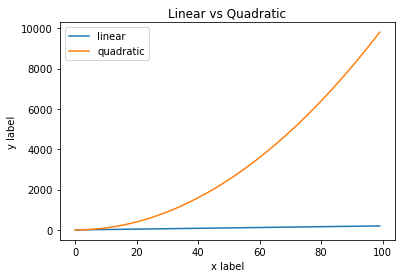

In [4]:
# Method 1

plt.plot(x, y, label = 'linear')
plt.plot(x, z, label = 'quadratic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Linear vs Quadratic")
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

Text(0.5, 1.0, 'Linear')

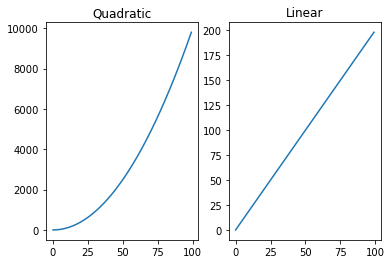

In [5]:
# Method 2

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.plot(x, z)
ax2.plot(x, y)
ax1.set_title('Quadratic')
ax2.set_title('Linear')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

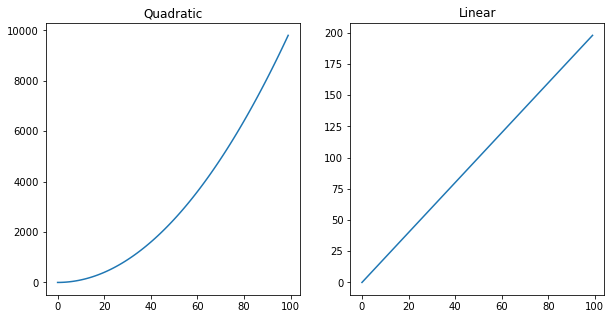

In [6]:
# your code here

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x, z)
ax2.plot(x, y)
ax1.set_title('Quadratic')
ax2.set_title('Linear')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

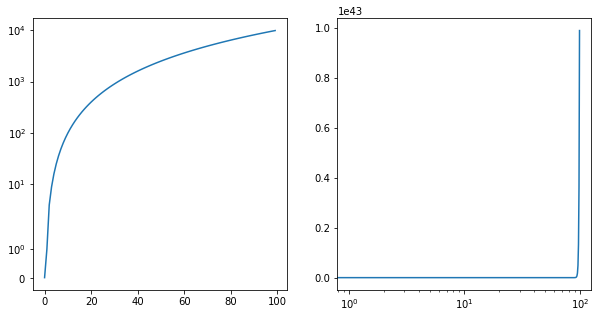

In [7]:
# your code here
from math import e

y=x**2

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x, y)
ax1.set_yscale('linear')

y=e**x

ax2.plot(x, y)
ax1.set_yscale('symlog')
ax2.set_xscale('log')

#### As a bonus challenge, try to add a legend to the plot.

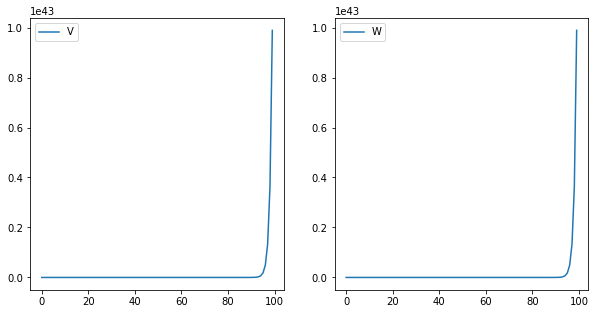

In [8]:
# your code here
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax1.plot(x, y, label='V')
ax2.plot(x, y, label='W')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')

print(fitbit.columns)

fitbit

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

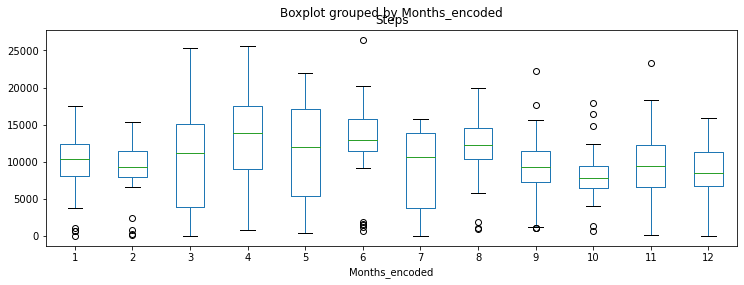

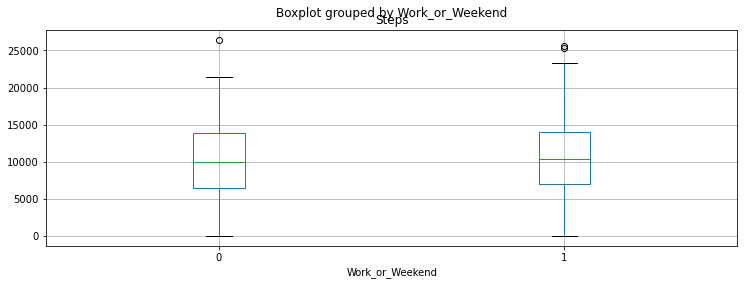

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

fitbit.boxplot(by = 'Months_encoded', column =['Steps'], grid=False, figsize=(12,4))
#plt.savefig('steps_by_months.png')
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

fitbit.boxplot(by = 'Work_or_Weekend', column =['Steps'], grid=True, figsize=(12,4))
#plt.savefig('steps_by_week_weekend.png')
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

     Steps  Minutes Lightly Active  Minutes Very Active  Minutes Sedentary
0      905                      46                    0              1.355
1    18925                     316                   60            611.000
2    14228                     226                   77            602.000
3     6756                     190                    4            749.000
4      502                     171                    0            876.000
..     ...                     ...                  ...                ...
362  18588                     275                   79            599.000
363  16382                     333                   55            684.000
364  21913                     287                   90            701.000
365  19023                     298                   85            575.000
366   9526                     370                   10            564.000

[367 rows x 4 columns]


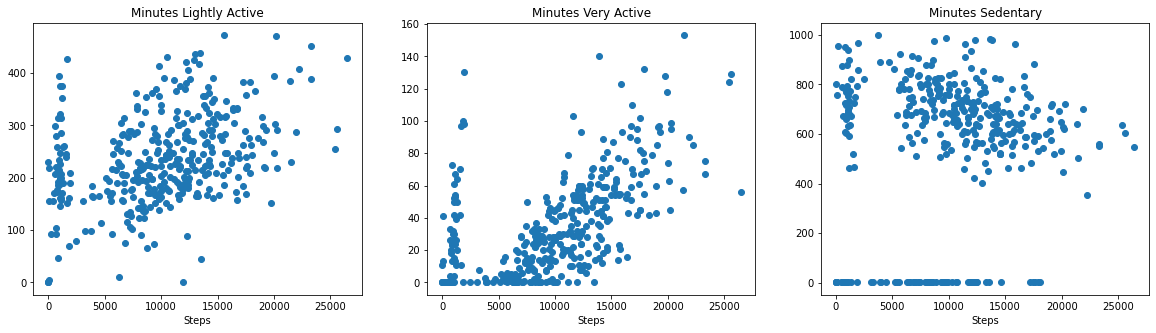

In [11]:
# your code here

fitbit.columns

active_times = fitbit[['Steps', 'Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']]

print(active_times)

columns = list(active_times.columns)
columns.remove('Steps')

fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(active_times['Steps'], active_times[col], 'o')
    ax[idx].set_xlabel('Steps')
    ax[idx].set_title(col)

plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
# your code here

titanic = pd.read_csv('titanic.csv')

titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=['number']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=['category']).columns

Index([], dtype='object')

In [16]:
titanic.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [17]:
# your code here

import matplotlib.style
import matplotlib as mpl

mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [12, 6]

#### Use the right visulalization to show the distribution of column `Age`.

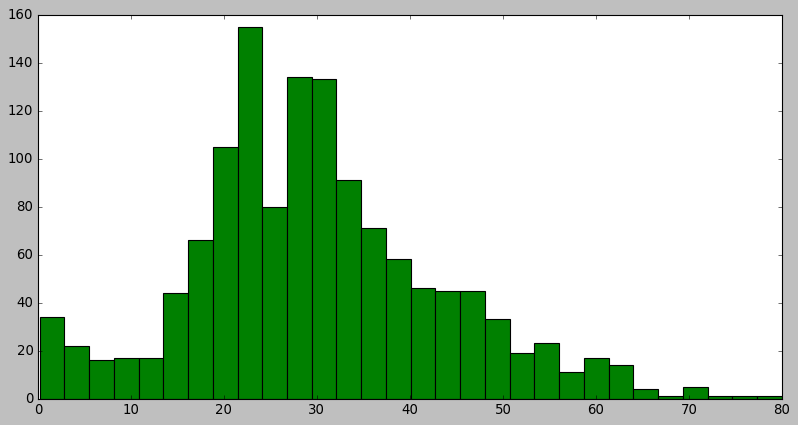

In [18]:
# your code here

plt.hist(titanic['Age'], color = 'green', bins = 30)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

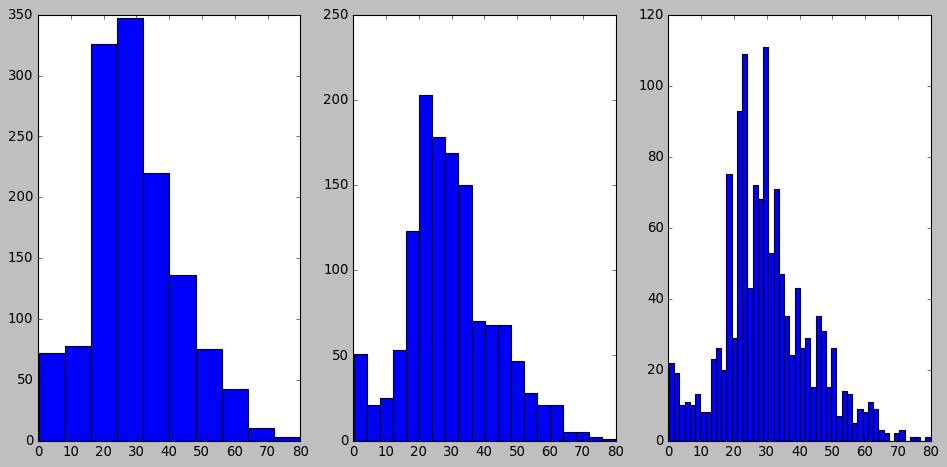

In [19]:
# your code here

fig, axs = plt.subplots(1, 3, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(titanic['Age'], bins=10)
axs[1].hist(titanic['Age'], bins=20)
axs[2].hist(titanic['Age'], bins=50)

plt.show()

#### How does the bin size affect your plot?

In [20]:
"""The bin width (and thus number of categories or ranges) affects the ability of a histogram to identify local regions of higher incidence. Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped."""

# source: internet :)

'The bin width (and thus number of categories or ranges) affects the ability of a histogram to identify local regions of higher incidence. Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped.'

#### Use seaborn to show the distribution of column `Age`.

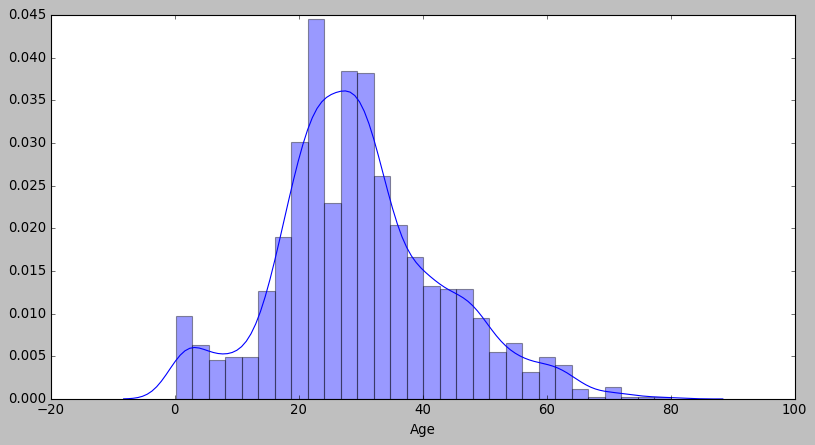

In [21]:
# your code here

ax = sns.distplot(titanic['Age'])


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

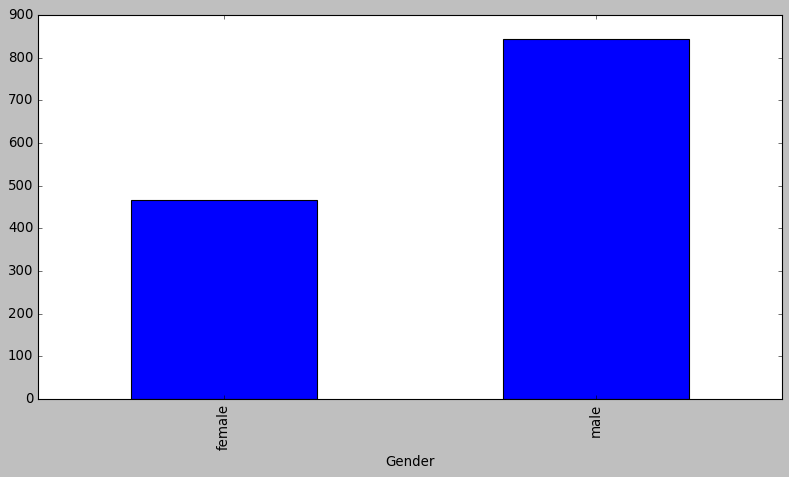

In [22]:
# Method 1 - matplotlib
# your code here

titanic.groupby('Gender').size().plot(kind='bar')
plt.show()

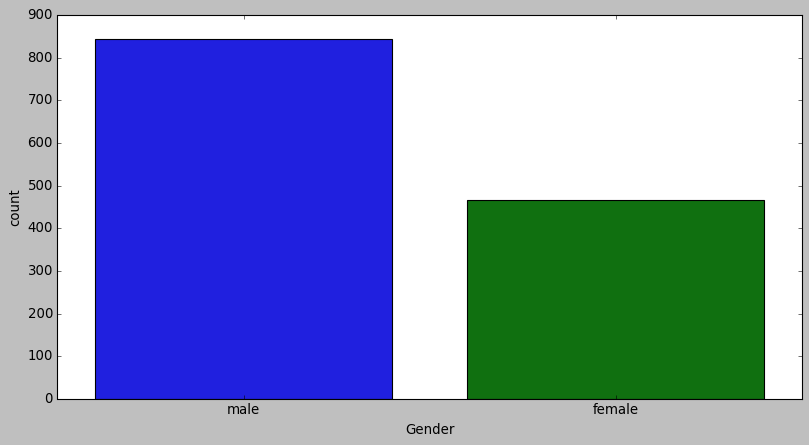

In [23]:
# Method 2 - seaborn
# your code here

gender = sns.countplot(x='Gender', data=titanic)

#### Use the right plot to visualize the column `Pclass`.

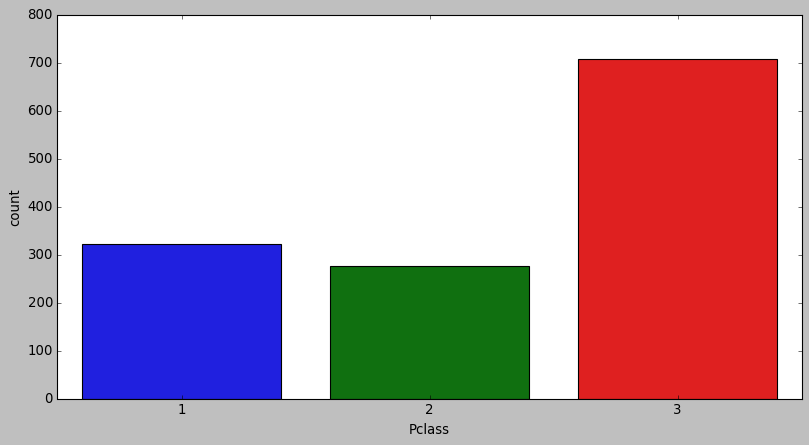

In [24]:
# your code here

pclass = sns.countplot(x='Pclass', data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

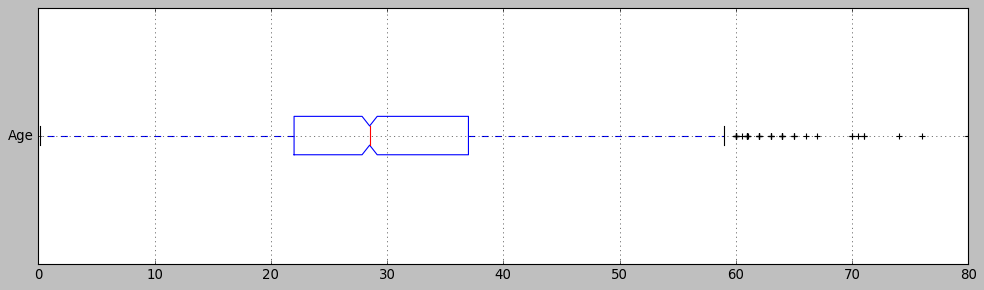

In [25]:
# your code here

titanic.boxplot(column = ['Age'], vert=False, notch=True, figsize=(15,4))
plt.show()

In [26]:
"""A Box Plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum."""

# source: internet  

'A Box Plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum.'

In [27]:
titanic['Age'].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### What does the last plot tell you about the feature `Age`?

In [28]:
"""That the median age is around 28"""

'That the median age is around 28'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

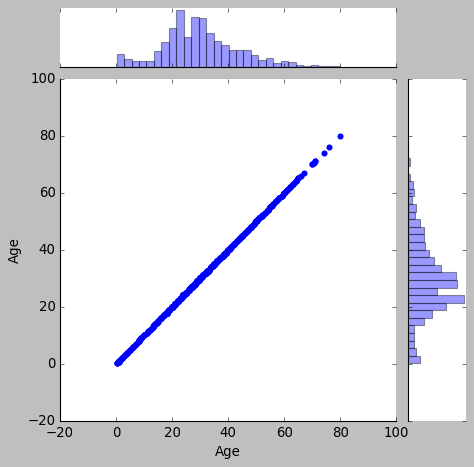

In [29]:
# your code here

# I think the following plot is not the wanted plot but this is the only, I could come up with..

sns.jointplot(x='Age', y='Age', data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [30]:
"""That the distribution of age, follows normal distribution"""

'That the distribution of age, follows normal distribution'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

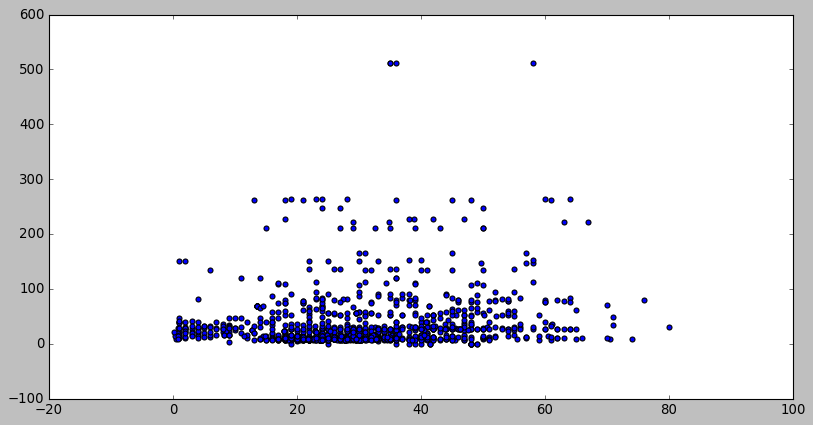

In [31]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic['Age'], titanic['Fare'])
plt.show()

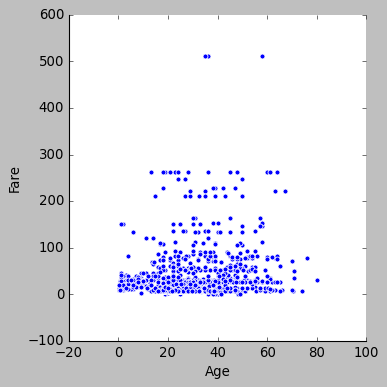

In [32]:
# Method 2 - seaborn
# your code here

sns.relplot(x = 'Age', y = 'Fare', data = titanic)
plt.show()

#### Plot the correlation matrix using seaborn.

In [33]:
# your code here

titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


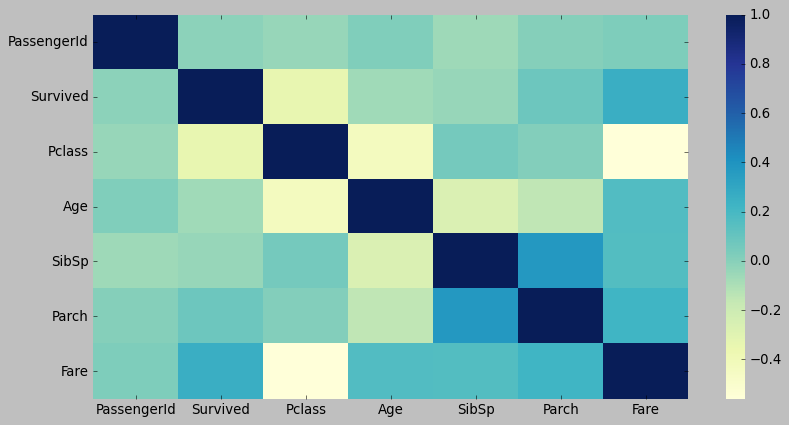

In [34]:
sns.heatmap(titanic.corr(), cmap="YlGnBu")

#### What are the most correlated features?

In [35]:
"""(Fare - Pclass) (Parch - SibSp)"""

'(Fare - Pclass) (Parch - SibSp)'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

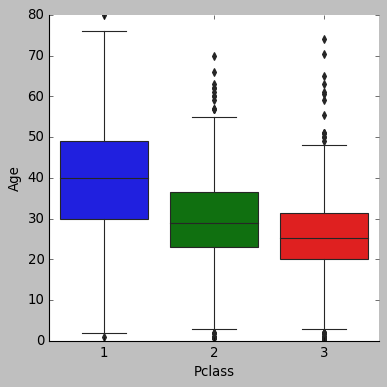

In [36]:
# your code here

sns.catplot(x = 'Pclass', y = 'Age',  kind = 'box', data = titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

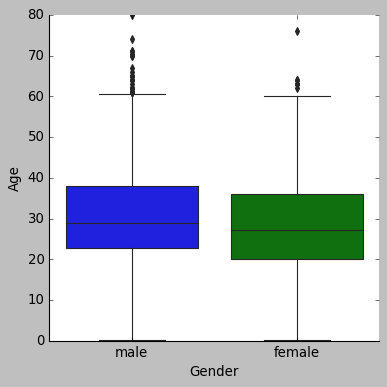

In [37]:
# your code here 
# kind "bar", "strip", "swarm" "box", "violin", or "boxen".

sns.catplot(x = 'Gender', y = 'Age',  kind = 'box', data = titanic)
plt.show()